In [1]:
# Simple perceptron
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

In [39]:
# Generate data
X, y, centers = datasets.make_blobs(
    n_samples=500,
    n_features=2,
    centers=2,
    cluster_std=1.05,
    random_state=2,
    return_centers=True
)

In [3]:
print(centers)

[[-1.28010196 -9.48147536]
 [ 0.99324956 -1.29355215]]


In [4]:
print(X)

[[  0.26095995  -9.83393657]
 [ -4.07252389  -9.57750062]
 [ -0.70107521  -7.07465695]
 [  0.23803302  -1.90613747]
 [  1.37033956  -0.64022071]
 [ -0.89113519  -8.05385981]
 [ -0.75207647 -10.78902785]
 [ -0.56333919  -0.40492466]
 [ -1.96601474  -8.59689627]
 [  0.15549524  -8.20269545]
 [  1.63390085  -0.8488804 ]
 [  2.39559403  -0.97579134]
 [ -1.60928556  -8.67191304]
 [  1.18267985  -0.71272966]
 [ -2.43377785  -7.81776395]
 [ -0.53278301  -1.64847081]
 [ -0.87914241  -8.88688615]
 [ -0.12058943  -0.6723023 ]
 [ -3.10495944  -8.38861021]
 [ -0.72959071  -8.70943181]
 [ -1.06568358  -8.00444431]
 [  0.80083016  -0.22270468]
 [  1.24676117  -0.77125522]
 [ -0.71409072 -10.10744305]
 [ -1.05318015 -11.43301837]
 [ -2.20211525  -9.64573124]
 [  0.61054651  -2.2133306 ]
 [ -3.83660791  -9.36311253]
 [ -0.4141638   -8.1708518 ]
 [  0.75358962  -3.46664502]
 [  0.51631031  -0.75346289]
 [ -0.32494902  -0.30848029]
 [  1.83238855   0.0321922 ]
 [ -1.23648559 -10.65529708]
 [ -1.99166131

In [5]:
print(y)

[0 0 0 1 1 0 0 1 0 0 1 1 0 1 0 1 0 1 0 0 0 1 1 0 0 0 1 0 0 1 1 1 1 0 0 0 0
 1 0 1 1 0 0 1 1 0 1 1 0 1 0 1 1 1 0 1 0 1 0 1 1 1 0 1 1 0 0 1 1 0 1 1 1 1
 0 1 0 0 0 1 0 0 1 1 0 1 1 0 1 0 1 0 0 1 0 0 1 0 0 1]


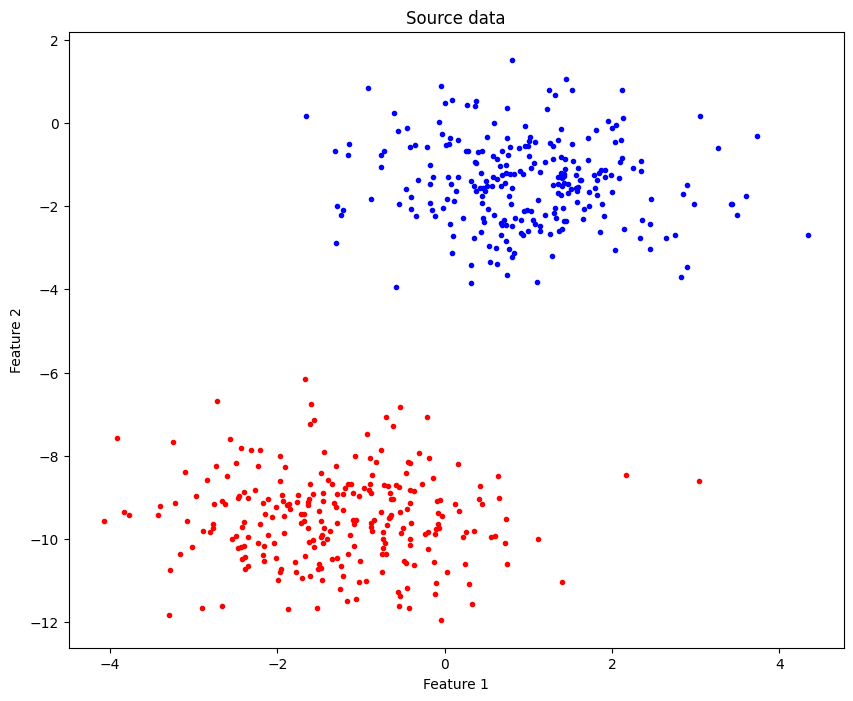

In [40]:
figure = plt.figure(figsize=(10, 8))
plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], 'r.')
plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], 'b.')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Source data")
plt.show()

In [26]:
# Define the Step Function
def step_function(z):
    return 1.0 if (z > 0.0) else 0.0

In [35]:
# Define Perceptron
def perceptron(X, y, learn_rate, epochs):
    m, n = X.shape  # 200 point shape of 2

    weights = np.zeros((n + 1, 1))

    n_miss_list = []

    for epoch in range(epochs):
        n_miss = 0

        for idx, x_i in enumerate(X):
            x_i = np.insert(x_i, 0, 1).reshape(-1, 1)

            x_w_production = np.dot(x_i.T, weights)
            perceptron_output = step_function(x_w_production)

            if (np.squeeze(perceptron_output) - y[idx]) != 0:
                weights += learn_rate * ((y[idx] - perceptron_output) * x_i)
                n_miss += 1

        n_miss_list.append(n_miss)

    return weights, n_miss_list


In [36]:
def plot_boundary(X, y, w):
    x1 = [min(X[:, 0]), max(X[:, 0])]
    m = -w[1] / w[2]
    c = -w[0] / w[2]
    x2 = m * x1 + c

    figure = plt.figure(figsize=(10, 8))
    plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], 'r.')
    plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], 'b.')
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.title("Bounded data")
    plt.plot(x1, x2, 'g-')
    plt.show()

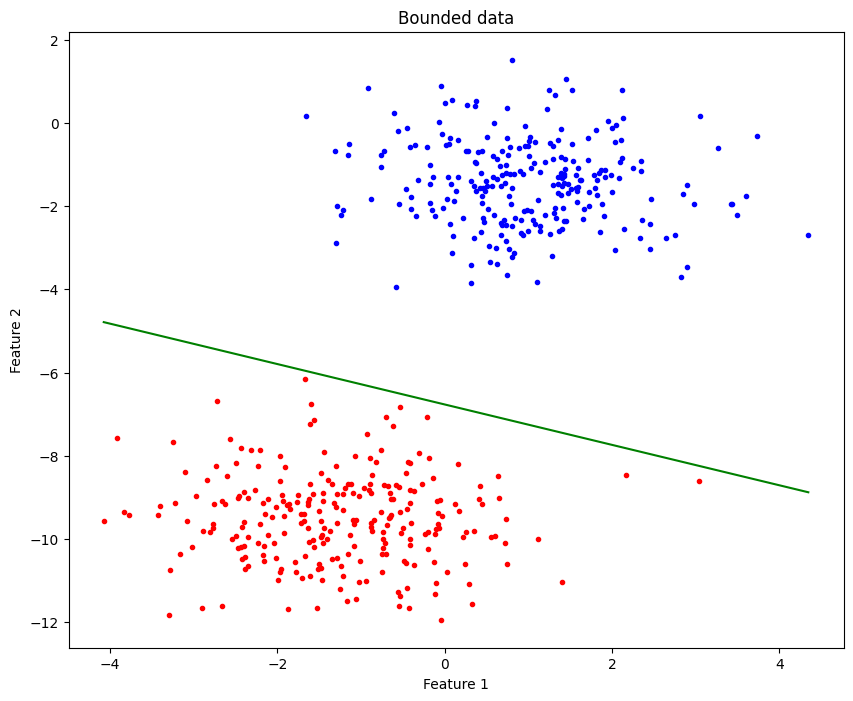

In [45]:
w, miss = perceptron(X, y, 0.1, 100)
plot_boundary(X, y, w)

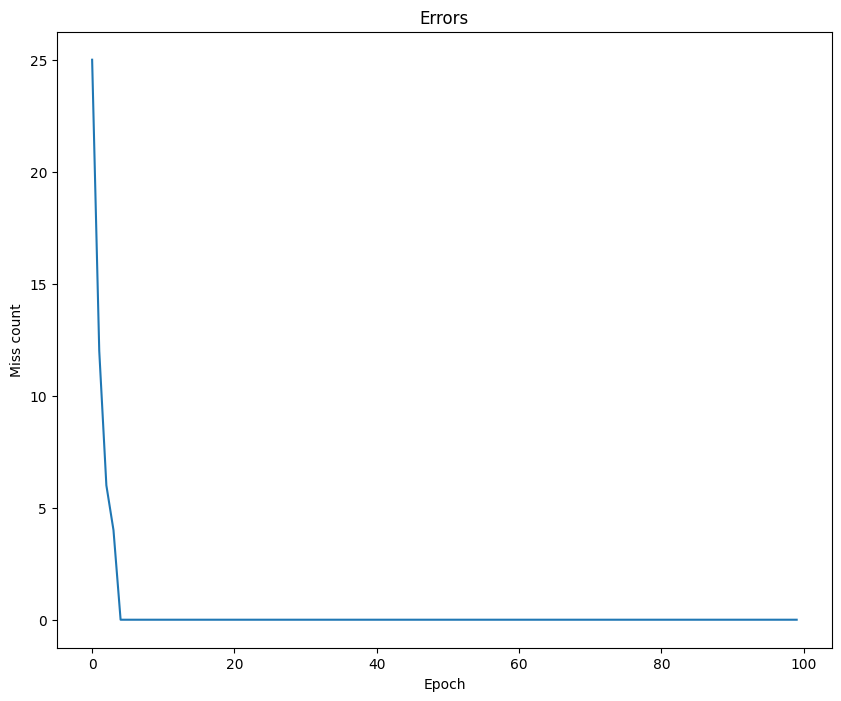

In [46]:
figure2 = plt.figure(figsize=(10, 8))
plt.xlabel("Epoch")
plt.ylabel("Miss count")
plt.title("Errors")
plt.plot(miss)
plt.show()